#  **Perbandingan Deep Learning FeedForward Neural Network - Local Binary Pattern (LBP) dengan Deep Learning Convolutional Neural Network untuk Pengenalan Citra Catur**

PEMENUHAN TUGAS BESAR VISI KOMPUTER ATAS NAMA :
1. MUHAMAD FARHAN WIRASANTOSO (1301204136)
2. RADLI MAULANA ARIEF (1301200369)

#LIBRARY

In [ ]:
!pip install tensorflow

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from skimage.feature import hog
from sklearn import datasets
from mlxtend.data import loadlocal_mnist
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import os

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"farhanwirasantoso","key":"16aec631e578b3bc0076ab8371001d92"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d niteshfre/chessman-image-dataset
!unzip chessman-image-dataset.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
chessman-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  chessman-image-dataset.zip
replace Chessman-image-dataset/Chess/Bishop/00000000.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Chessman-image-dataset/Chess/Bishop/00000000.JPG  
  inflating: Chessman-image-dataset/Chess/Bishop/00000001.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000002.JPG  
  inflating: Chessman-image-dataset/Chess/Bishop/00000003.png  
  inflating: Chessman-image-dataset/Chess/Bishop/00000004.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000006.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000007.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000008.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000009.png  
  inflating: Chessman-image-dataset/Chess/Bishop/00000010.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/000000

In [ ]:
dirname = 'Chessman-image-dataset/Chess'
dir_chess_folders = os.listdir(dirname)
dir_chess_paths = [os.path.join(dirname, path) for path in dir_chess_folders]
print(dir_chess_paths)

['Chessman-image-dataset/Chess/Pawn', 'Chessman-image-dataset/Chess/Queen', 'Chessman-image-dataset/Chess/Bishop', 'Chessman-image-dataset/Chess/Knight', 'Chessman-image-dataset/Chess/Rook', 'Chessman-image-dataset/Chess/King']


#IMPLEMENTASI

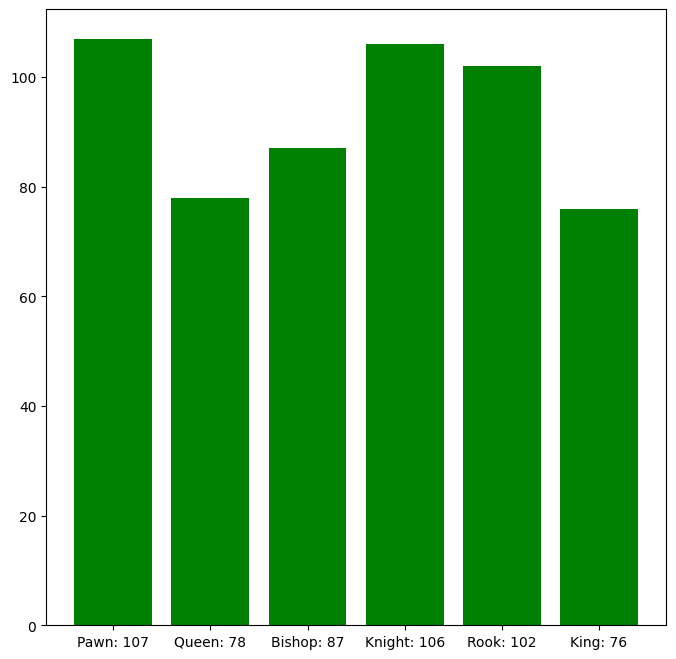

In [ ]:
chess_dic = {}
for path in dir_chess_paths:
    head, tail = os.path.split(path)
    chess_dic[tail] = len(os.listdir(path))
label_list = ["{}: {}".format(key, chess_dic[key]) for key in chess_dic]
plt.figure(figsize=(8, 8))
plt.bar(range(len(chess_dic)), list(chess_dic.values()), color="green")
plt.xticks(range(len(chess_dic)), list(label_list))
plt.show();

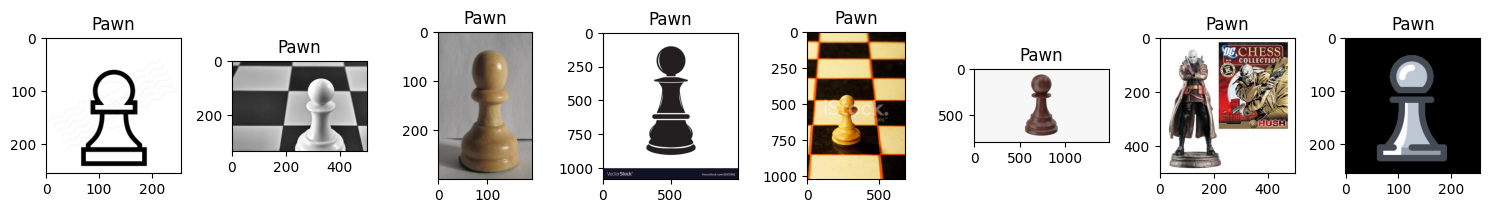

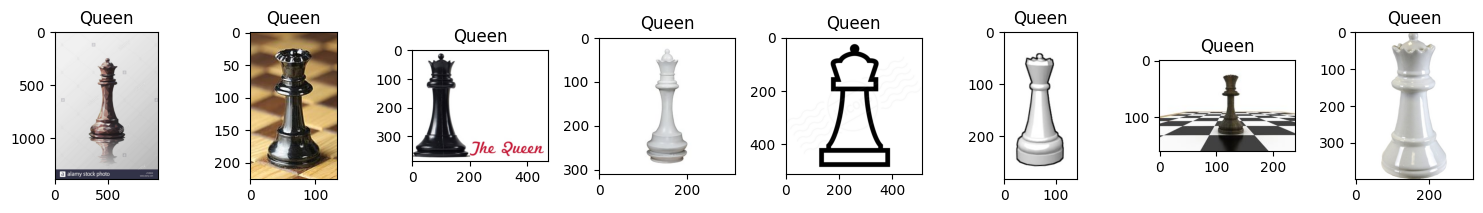

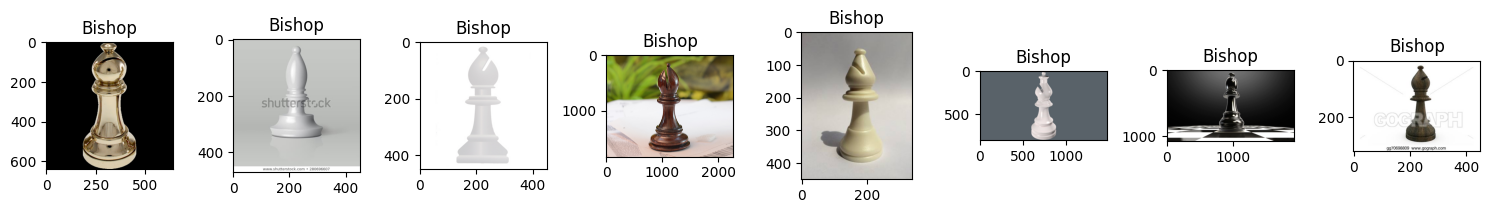

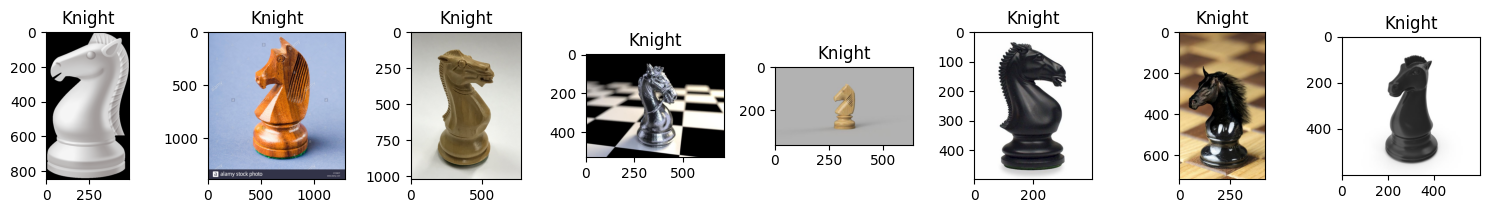

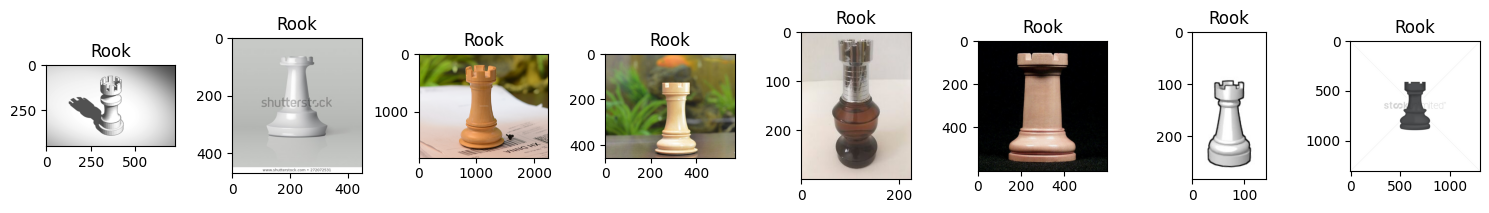

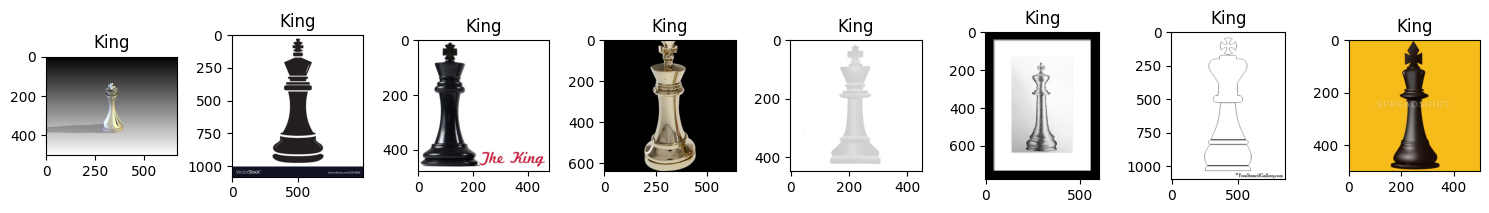

In [ ]:
def plot_imgs(item_dir, title=" ", num_imgs=4, cmap='viridis'):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(15, 15))
    for idx, img_path in enumerate(item_files):
        plt.subplot(8, 8, idx+1)
        img = plt.imread(img_path, 0)
        plt.title(title)
        plt.imshow(img, cmap=cmap)

    plt.tight_layout()

for path in dir_chess_paths:
    head, tail = os.path.split(path)
    plot_imgs(path, tail, 8)

In [ ]:
def getDataset(path, shape):
	generator=ImageDataGenerator()

	train_generator = generator.flow_from_directory(
		path,
		subset='training',
		target_size=shape,
		batch_size=551,
		class_mode='categorical'
	)
	return train_generator

def generatorToNumpy(generator):
	return generator.next()

In [ ]:
path='/content/Chessman-image-dataset/Chess'
batch_size=64
shape=(150,150)

train_generator = getDataset(path,shape)
class_name=list(train_generator.class_indices.keys())
X,y= generatorToNumpy(train_generator)
y=np.argmax(y,axis=1)
y=y.flatten()
(X.shape,y.shape)

Found 551 images belonging to 6 classes.


((551, 150, 150, 3), (551,))

In [ ]:
unique, counts = np.unique(y, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0  86]
 [  1  75]
 [  2 105]
 [  3 106]
 [  4  77]
 [  5 102]]


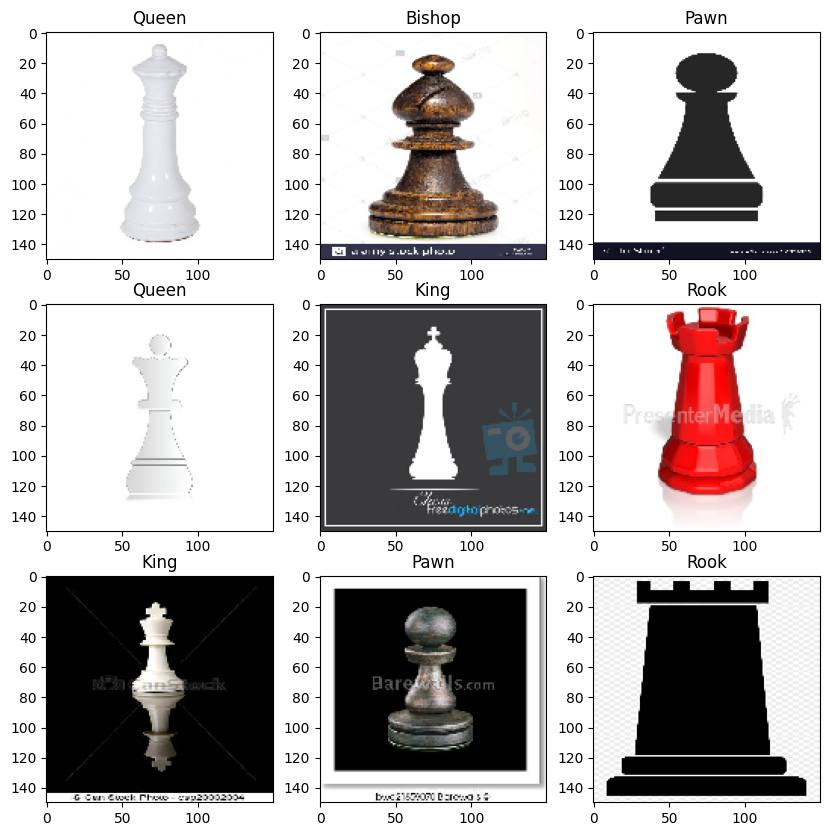

In [ ]:
# create a grid of 3x3 images
fig, ax = plt.subplots(3, 3, figsize=(10,10))
for i in range(3):
    for j in range(3):
        rand=np.random.randint(0,100)
        ax[i][j].imshow(X[rand].astype("uint8"))
        ax[i][j].set_title(class_name[y[rand]])
# show the plot
plt.show()

#IMPLEMENTASI FNN (FEEDFORWARD NEURAL NETWORK)

In [ ]:
def get_model():
	model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
	])

	model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
	return model

In [ ]:
def normalized(X):
    return X/255
def split(X_normalized,y):
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.1 ,shuffle=True,stratify=y)
    return X_train, X_test, y_train, y_test

X_normalized= normalized(X)
X_train, X_test, y_train, y_test=split(X_normalized,y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((495, 150, 150, 3), (495,), (56, 150, 150, 3), (56,))

In [ ]:
# Pisahkan data menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=None)

# Dapatkan model (pastikan Anda telah mendefinisikan get_model())
model = get_model()

# Callback untuk menyimpan model terbaik berdasarkan val_accuracy
checkpoint = ModelCheckpoint("MLONLY_best_model.hdf5", monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max', save_weights_only=False)

# Compile model dengan optimizer, loss, dan metrik yang sesuai
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=551)

# Pelatihan model dengan menggunakan data pelatihan dan validasi
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[checkpoint],
    verbose=1
)


Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 1.7918 - accuracy: 0.1640
Epoch 1: val_accuracy improved from -inf to 0.12000, saving model to MLONLY_best_model.hdf5
1/1 [==============================] - 2s 2s/step - loss: 1.7918 - accuracy: 0.1640 - val_loss: 88.1731 - val_accuracy: 0.1200
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - ETA: 0s - loss: 1.7970 - accuracy: 0.2000
Epoch 2: val_accuracy did not improve from 0.12000
1/1 [==============================] - 2s 2s/step - loss: 1.7970 - accuracy: 0.2000 - val_loss: 57.1310 - val_accuracy: 0.1200
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 1.7819 - accuracy: 0.2000
Epoch 3: val_accuracy did not improve from 0.12000
1/1 [==============================] - 2s 2s/step - loss: 1.7819 - accuracy: 0.2000 - val_loss: 55.7429 - val_accuracy: 0.1200
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 1.7820 - accuracy: 0.2000
Epoch 4: val_accuracy did not improve from 0.12000
1/1 [==============================] - 2s 2s/step - loss: 1.7820 - accuracy: 0.2000 - val_loss: 60.5780 - val_accuracy: 0.1200
Epoch 5/100
1/1 [==============================] - ETA: 0s - loss: 1.7812 - accuracy: 0.2000
Epoch 5: val_accuracy did not improve from 0.12000
1/1 [==============================] - 2s 2s/step - los

In [ ]:
def evaluateModel(model,path,X_train,y_train,X_test,y_test):
	model.load_weights(path)
	print("On Train Data")
	model.evaluate(X_train,y_train)
	print("On validation set")
	model.evaluate(X_test,y_test)

evaluateModel(model,"MLONLY_best_model.hdf5",X_train,y_train,X_test,y_test)

On Train Data
14/14 [==============================] - 0s 4ms/step - loss: 64.0945 - accuracy: 0.2135
On validation set
2/2 [==============================] - 0s 6ms/step - loss: 57.8124 - accuracy: 0.1607


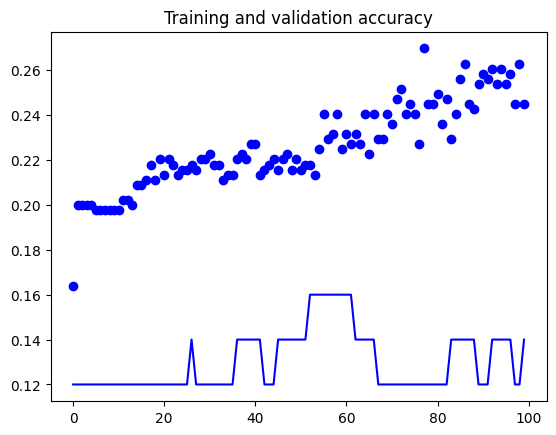

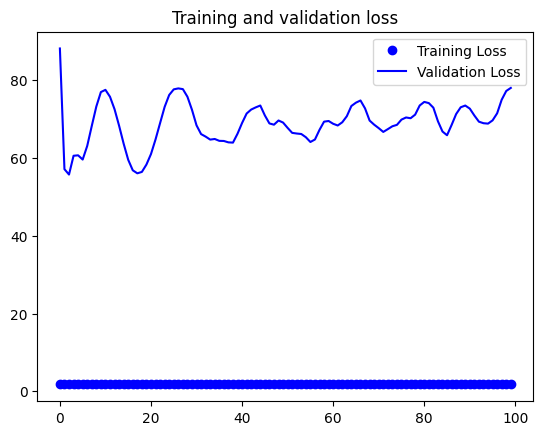

In [ ]:
# Plotting the evaluation
def plotHistory(history):
	acc = history.history['accuracy']
	val_acc = history.history['val_accuracy']
	loss = history.history['loss']
	val_loss = history.history['val_loss']

	epochs = range(len(acc))

	plt.plot(epochs, acc, 'bo', label='Training accuracy')
	plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
	plt.title('Training and validation accuracy')

	plt.figure()

	plt.plot(epochs, loss, 'bo', label='Training Loss')
	plt.plot(epochs, val_loss, 'b', label='Validation Loss')
	plt.title('Training and validation loss')
	plt.legend()

	plt.show()

plotHistory(history)

In [ ]:
pred=model.predict(X_test)
pred=np.argmax(pred,axis=1)
print('\nClassification Report')
target_names = ['Bishop',
                'King',
                'Rook',
                'Pawn',
                'Queen',
                'Knight']
class_report = classification_report(y_test,pred, target_names=target_names)
print(class_report)

2/2 [==============================] - 0s 5ms/step

Classification Report
              precision    recall  f1-score   support

      Bishop       0.14      0.11      0.12         9
        King       0.00      0.00      0.00         7
        Rook       0.28      1.00      0.44        11
        Pawn       0.11      0.09      0.10        11
       Queen       0.00      0.00      0.00         8
      Knight       0.00      0.00      0.00        10

    accuracy                           0.23        56
   macro avg       0.09      0.20      0.11        56
weighted avg       0.10      0.23      0.13        56



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#LBP DENGAN GAMBAR KING

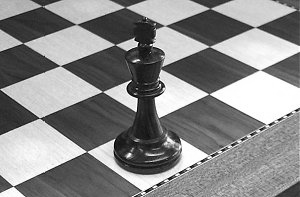

In [ ]:
import numpy as np
import matplotlib.pyplot as plt      # importing the matplotlib and cv2 for plottig and reading the image file
import cv2


from google.colab.patches import cv2_imshow

img= cv2.imread("Chessman-image-dataset/Chess/King/00000127.jpg")

gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def Binarypattern(im):                               # creating function to get local binary pattern
    img= np.zeros_like(im)
    n=3                                              # taking kernel of size 3*3
    for i in range(0,im.shape[0]-n):                 # for image height
      for j in range(0,im.shape[1]-n):               # for image width
            x  = im[i:i+n,j:j+n]                     # reading the entire image in 3*3 format
            center       = x[1,1]                    # taking the center value for 3*3 kernel
            img1        = (x >= center)*1.0          # checking if neighbouring values of center value is greater or less than center value
            img1_vector = img1.T.flatten()           # getting the image pixel values
            img1_vector = np.delete(img1_vector,4)
            digit = np.where(img1_vector)[0]
            if len(digit) >= 1:                     # converting the neighbouring pixels according to center pixel value
                num = np.sum(2**digit)              # if n> center assign 1 and if n
            else:                                   # if 1 then multiply by 2^digit and if 0 then making value 0 and aggregating all the values of kernel to get new center value
                num = 0
            img[i+1,j+1] = num
    return(img)

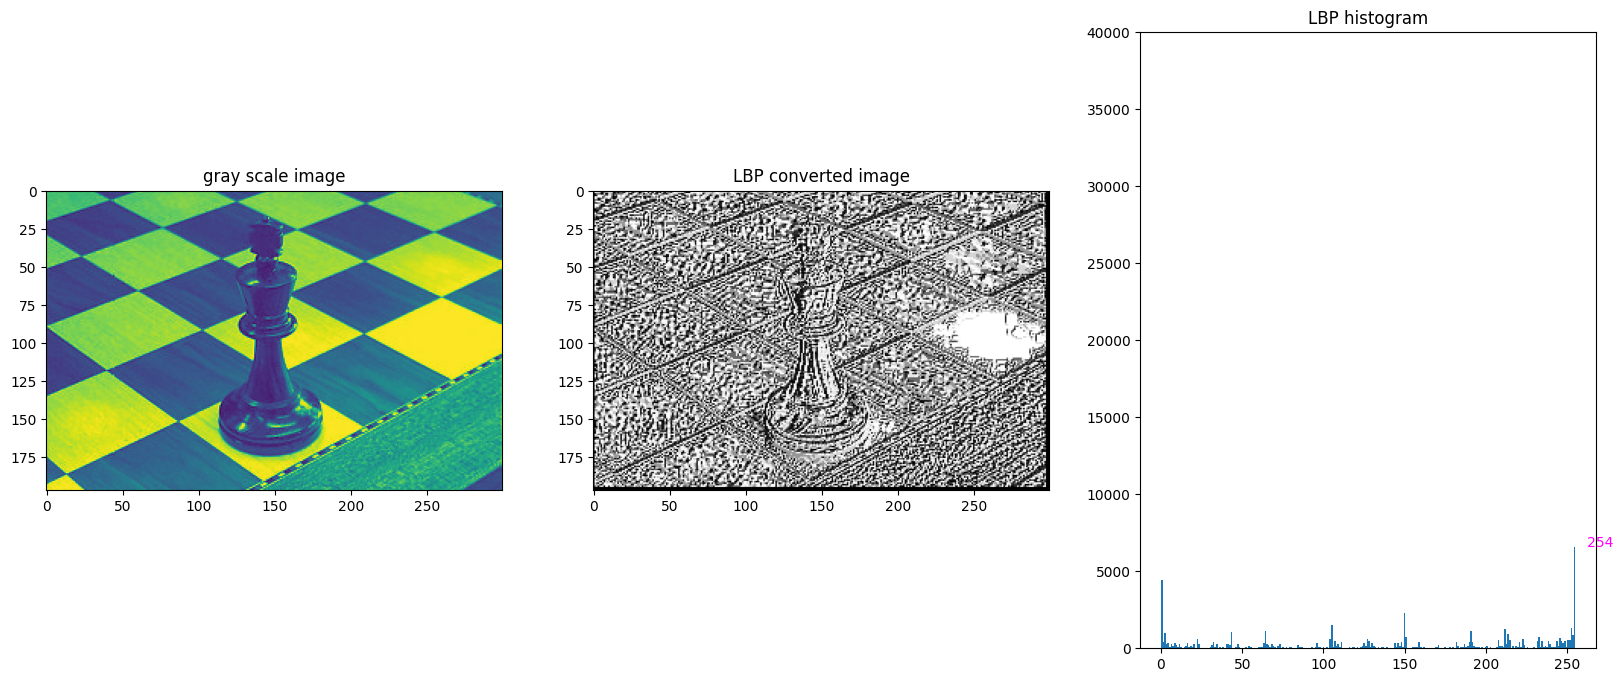

In [ ]:
imgLBP=Binarypattern(gray_img)             # calling the LBP function using gray image
vectorLBP = imgLBP.flatten()               # for histogram using the vector form of image pixels
fig=plt.figure(figsize=(20,8))             #subplotting the gray, LBP and histogram
ax  = fig.add_subplot(1,3,1)
ax.imshow(gray_img)
ax.set_title("gray scale image")
ax  = fig.add_subplot(1,3,2)
ax.imshow(imgLBP,cmap="gray")
ax.set_title("LBP converted image")
ax  = fig.add_subplot(1,3,3)
freq,lbp, _ = ax.hist(vectorLBP,bins=2**8)
ax.set_ylim(0,40000)
lbp = lbp[:-1]
## print the LBP values when frequencies are high
largeTF = freq > 5000
for x, fr in zip(lbp[largeTF],freq[largeTF]):
     ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
ax.set_title("LBP histogram")
plt.show()

#LBP DENGAN GAMBAR QUEEN

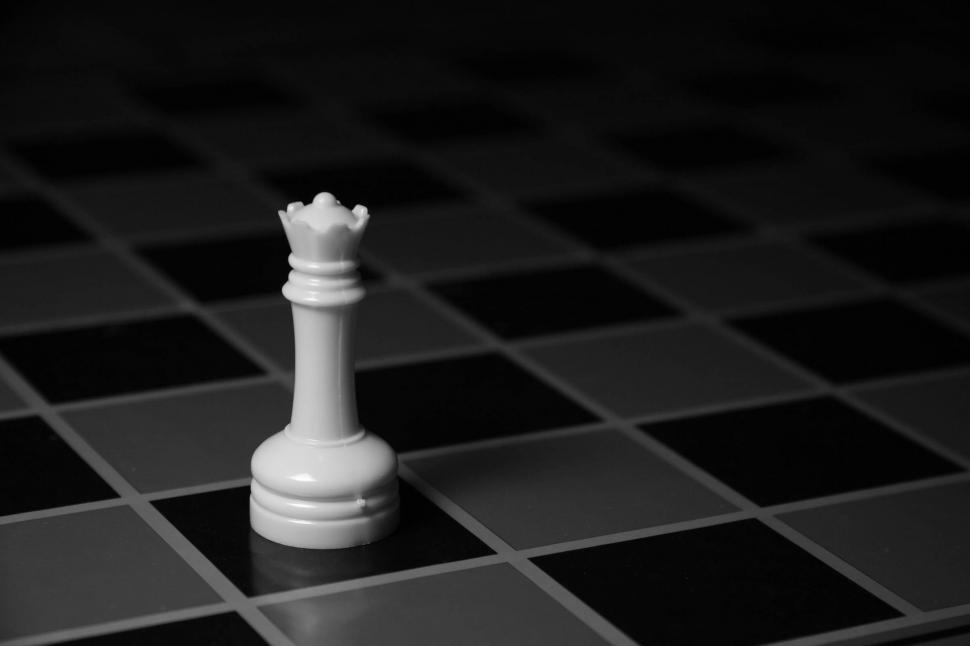

In [ ]:
import numpy as np
import matplotlib.pyplot as plt      # importing the matplotlib and cv2 for plottig and reading the image file
import cv2


from google.colab.patches import cv2_imshow

img= cv2.imread("Chessman-image-dataset/Chess/Queen/00000139.jpg")

gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def Binarypattern(im):                               # creating function to get local binary pattern
    img= np.zeros_like(im)
    n=3                                              # taking kernel of size 3*3
    for i in range(0,im.shape[0]-n):                 # for image height
      for j in range(0,im.shape[1]-n):               # for image width
            x  = im[i:i+n,j:j+n]                     # reading the entire image in 3*3 format
            center       = x[1,1]                    # taking the center value for 3*3 kernel
            img1        = (x >= center)*1.0          # checking if neighbouring values of center value is greater or less than center value
            img1_vector = img1.T.flatten()           # getting the image pixel values
            img1_vector = np.delete(img1_vector,4)
            digit = np.where(img1_vector)[0]
            if len(digit) >= 1:                     # converting the neighbouring pixels according to center pixel value
                num = np.sum(2**digit)              # if n> center assign 1 and if n
            else:                                   # if 1 then multiply by 2^digit and if 0 then making value 0 and aggregating all the values of kernel to get new center value
                num = 0
            img[i+1,j+1] = num
    return(img)

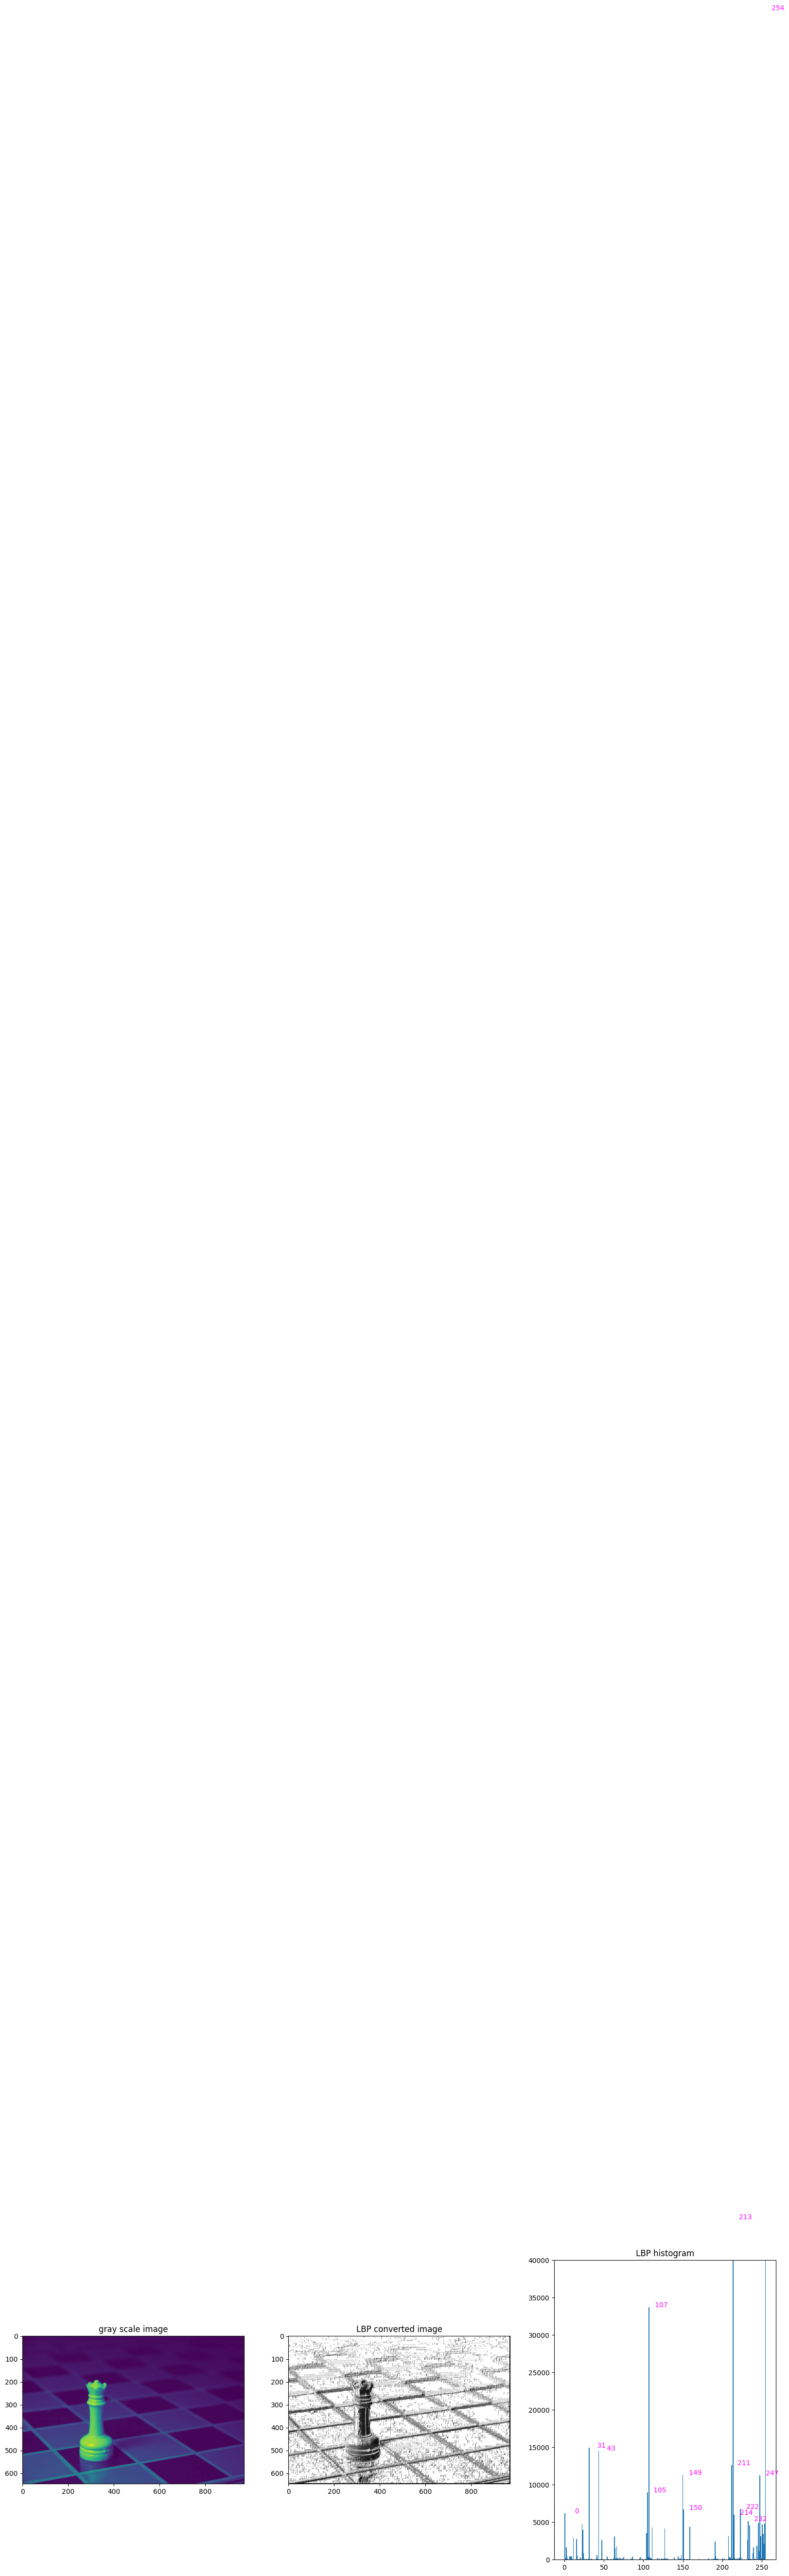

In [ ]:
imgLBP=Binarypattern(gray_img)             # calling the LBP function using gray image
vectorLBP = imgLBP.flatten()               # for histogram using the vector form of image pixels
fig=plt.figure(figsize=(20,8))             #subplotting the gray, LBP and histogram
ax  = fig.add_subplot(1,3,1)
ax.imshow(gray_img)
ax.set_title("gray scale image")
ax  = fig.add_subplot(1,3,2)
ax.imshow(imgLBP,cmap="gray")
ax.set_title("LBP converted image")
ax  = fig.add_subplot(1,3,3)
freq,lbp, _ = ax.hist(vectorLBP,bins=2**8)
ax.set_ylim(0,40000)
lbp = lbp[:-1]
## print the LBP values when frequencies are high
largeTF = freq > 5000
for x, fr in zip(lbp[largeTF],freq[largeTF]):
     ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
ax.set_title("LBP histogram")
plt.show()

#LBP DENGAN GAMBAR KNIGHT

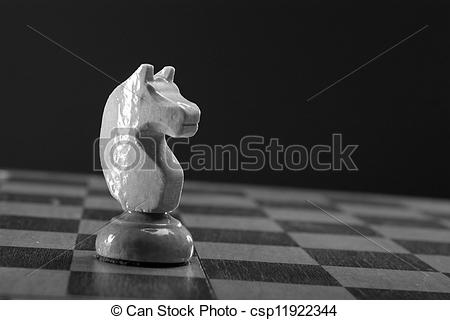

In [ ]:
import numpy as np
import matplotlib.pyplot as plt      # importing the matplotlib and cv2 for plottig and reading the image file
import cv2


from google.colab.patches import cv2_imshow

img= cv2.imread("Chessman-image-dataset/Chess/Knight/00000142.jpg")

gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def Binarypattern(im):                               # creating function to get local binary pattern
    img= np.zeros_like(im)
    n=3                                              # taking kernel of size 3*3
    for i in range(0,im.shape[0]-n):                 # for image height
      for j in range(0,im.shape[1]-n):               # for image width
            x  = im[i:i+n,j:j+n]                     # reading the entire image in 3*3 format
            center       = x[1,1]                    # taking the center value for 3*3 kernel
            img1        = (x >= center)*1.0          # checking if neighbouring values of center value is greater or less than center value
            img1_vector = img1.T.flatten()           # getting the image pixel values
            img1_vector = np.delete(img1_vector,4)
            digit = np.where(img1_vector)[0]
            if len(digit) >= 1:                     # converting the neighbouring pixels according to center pixel value
                num = np.sum(2**digit)              # if n> center assign 1 and if n
            else:                                   # if 1 then multiply by 2^digit and if 0 then making value 0 and aggregating all the values of kernel to get new center value
                num = 0
            img[i+1,j+1] = num
    return(img)

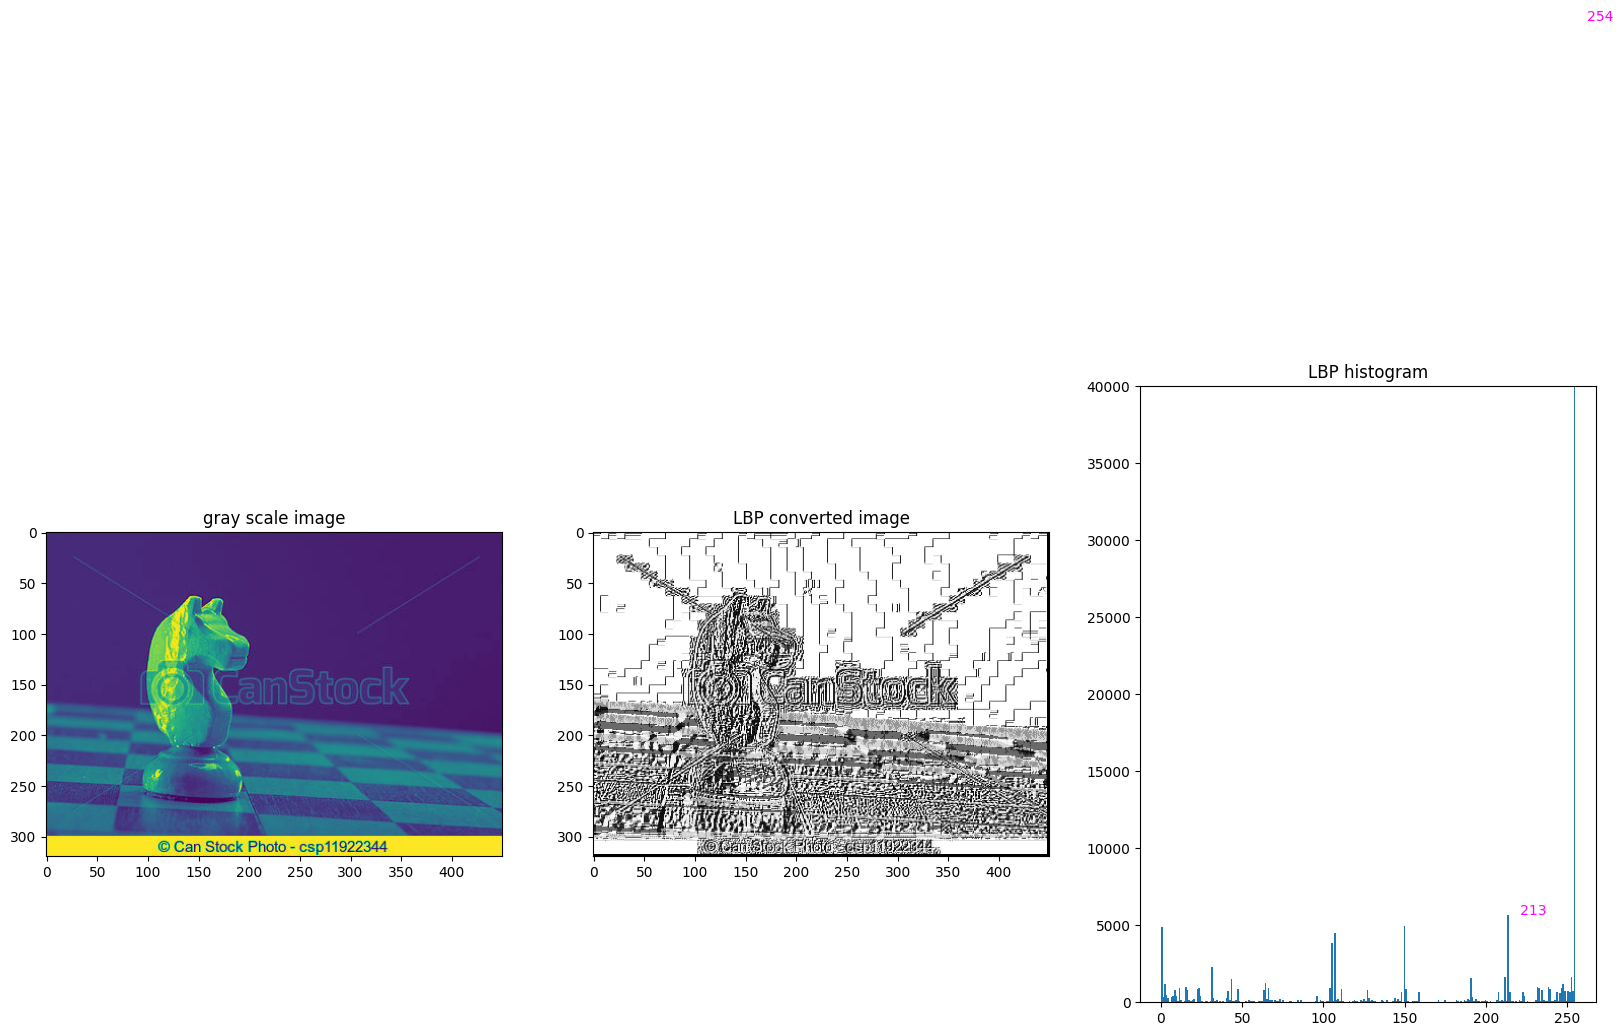

In [ ]:
imgLBP=Binarypattern(gray_img)             # calling the LBP function using gray image
vectorLBP = imgLBP.flatten()               # for histogram using the vector form of image pixels
fig=plt.figure(figsize=(20,8))             #subplotting the gray, LBP and histogram
ax  = fig.add_subplot(1,3,1)
ax.imshow(gray_img)
ax.set_title("gray scale image")
ax  = fig.add_subplot(1,3,2)
ax.imshow(imgLBP,cmap="gray")
ax.set_title("LBP converted image")
ax  = fig.add_subplot(1,3,3)
freq,lbp, _ = ax.hist(vectorLBP,bins=2**8)
ax.set_ylim(0,40000)
lbp = lbp[:-1]
## print the LBP values when frequencies are high
largeTF = freq > 5000
for x, fr in zip(lbp[largeTF],freq[largeTF]):
     ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
ax.set_title("LBP histogram")
plt.show()

#LBP DENGAN GAMBAR BISHOP

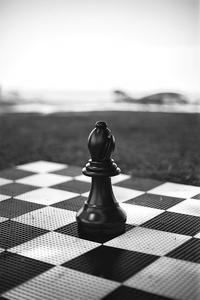

In [ ]:
import numpy as np
import matplotlib.pyplot as plt      # importing the matplotlib and cv2 for plottig and reading the image file
import cv2


from google.colab.patches import cv2_imshow

img= cv2.imread("Chessman-image-dataset/Chess/Bishop/00000188.jpg")

gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def Binarypattern(im):                               # creating function to get local binary pattern
    img= np.zeros_like(im)
    n=3                                              # taking kernel of size 3*3
    for i in range(0,im.shape[0]-n):                 # for image height
      for j in range(0,im.shape[1]-n):               # for image width
            x  = im[i:i+n,j:j+n]                     # reading the entire image in 3*3 format
            center       = x[1,1]                    # taking the center value for 3*3 kernel
            img1        = (x >= center)*1.0          # checking if neighbouring values of center value is greater or less than center value
            img1_vector = img1.T.flatten()           # getting the image pixel values
            img1_vector = np.delete(img1_vector,4)
            digit = np.where(img1_vector)[0]
            if len(digit) >= 1:                     # converting the neighbouring pixels according to center pixel value
                num = np.sum(2**digit)              # if n> center assign 1 and if n
            else:                                   # if 1 then multiply by 2^digit and if 0 then making value 0 and aggregating all the values of kernel to get new center value
                num = 0
            img[i+1,j+1] = num
    return(img)

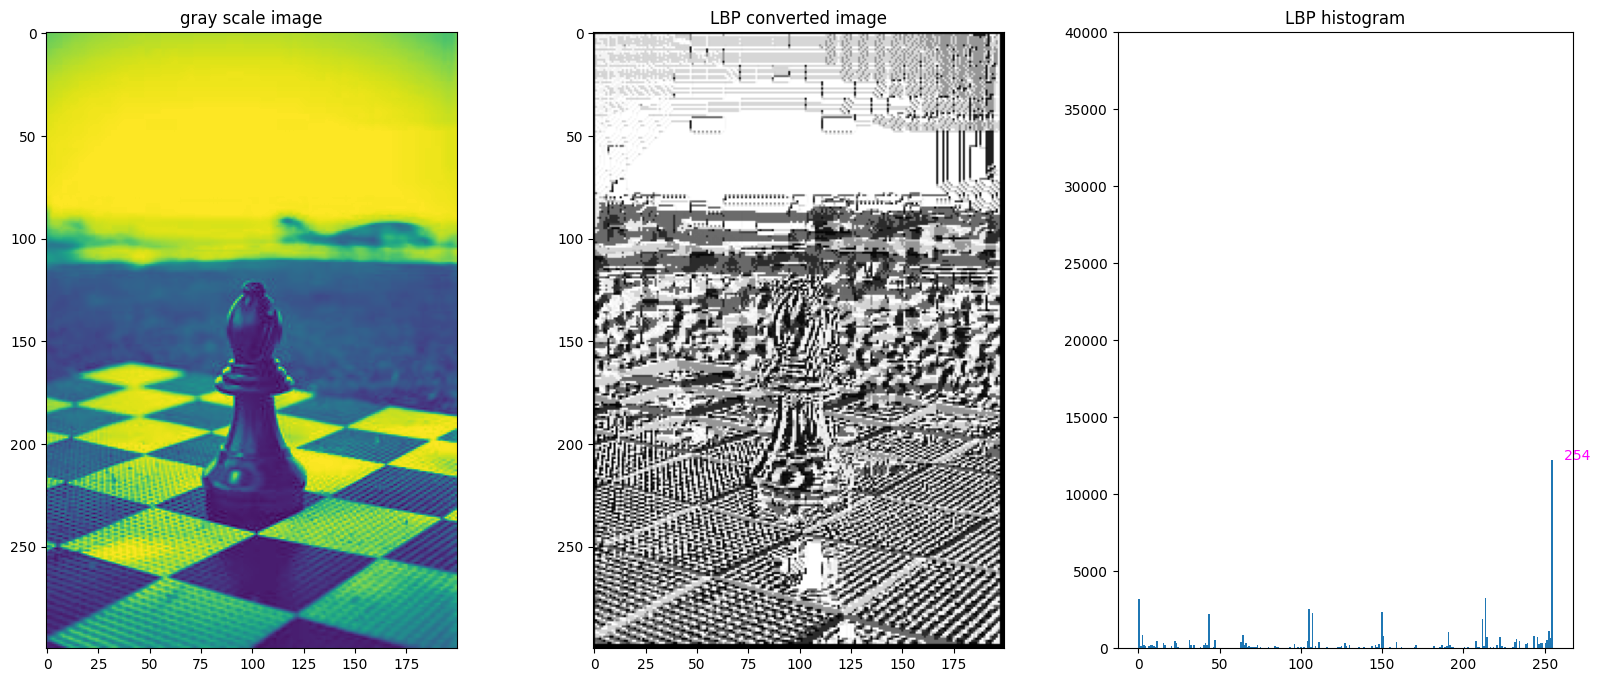

In [ ]:
imgLBP=Binarypattern(gray_img)             # calling the LBP function using gray image
vectorLBP = imgLBP.flatten()               # for histogram using the vector form of image pixels
fig=plt.figure(figsize=(20,8))             #subplotting the gray, LBP and histogram
ax  = fig.add_subplot(1,3,1)
ax.imshow(gray_img)
ax.set_title("gray scale image")
ax  = fig.add_subplot(1,3,2)
ax.imshow(imgLBP,cmap="gray")
ax.set_title("LBP converted image")
ax  = fig.add_subplot(1,3,3)
freq,lbp, _ = ax.hist(vectorLBP,bins=2**8)
ax.set_ylim(0,40000)
lbp = lbp[:-1]
## print the LBP values when frequencies are high
largeTF = freq > 5000
for x, fr in zip(lbp[largeTF],freq[largeTF]):
     ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
ax.set_title("LBP histogram")
plt.show()

#LBP DENGAN GAMBAR ROOK

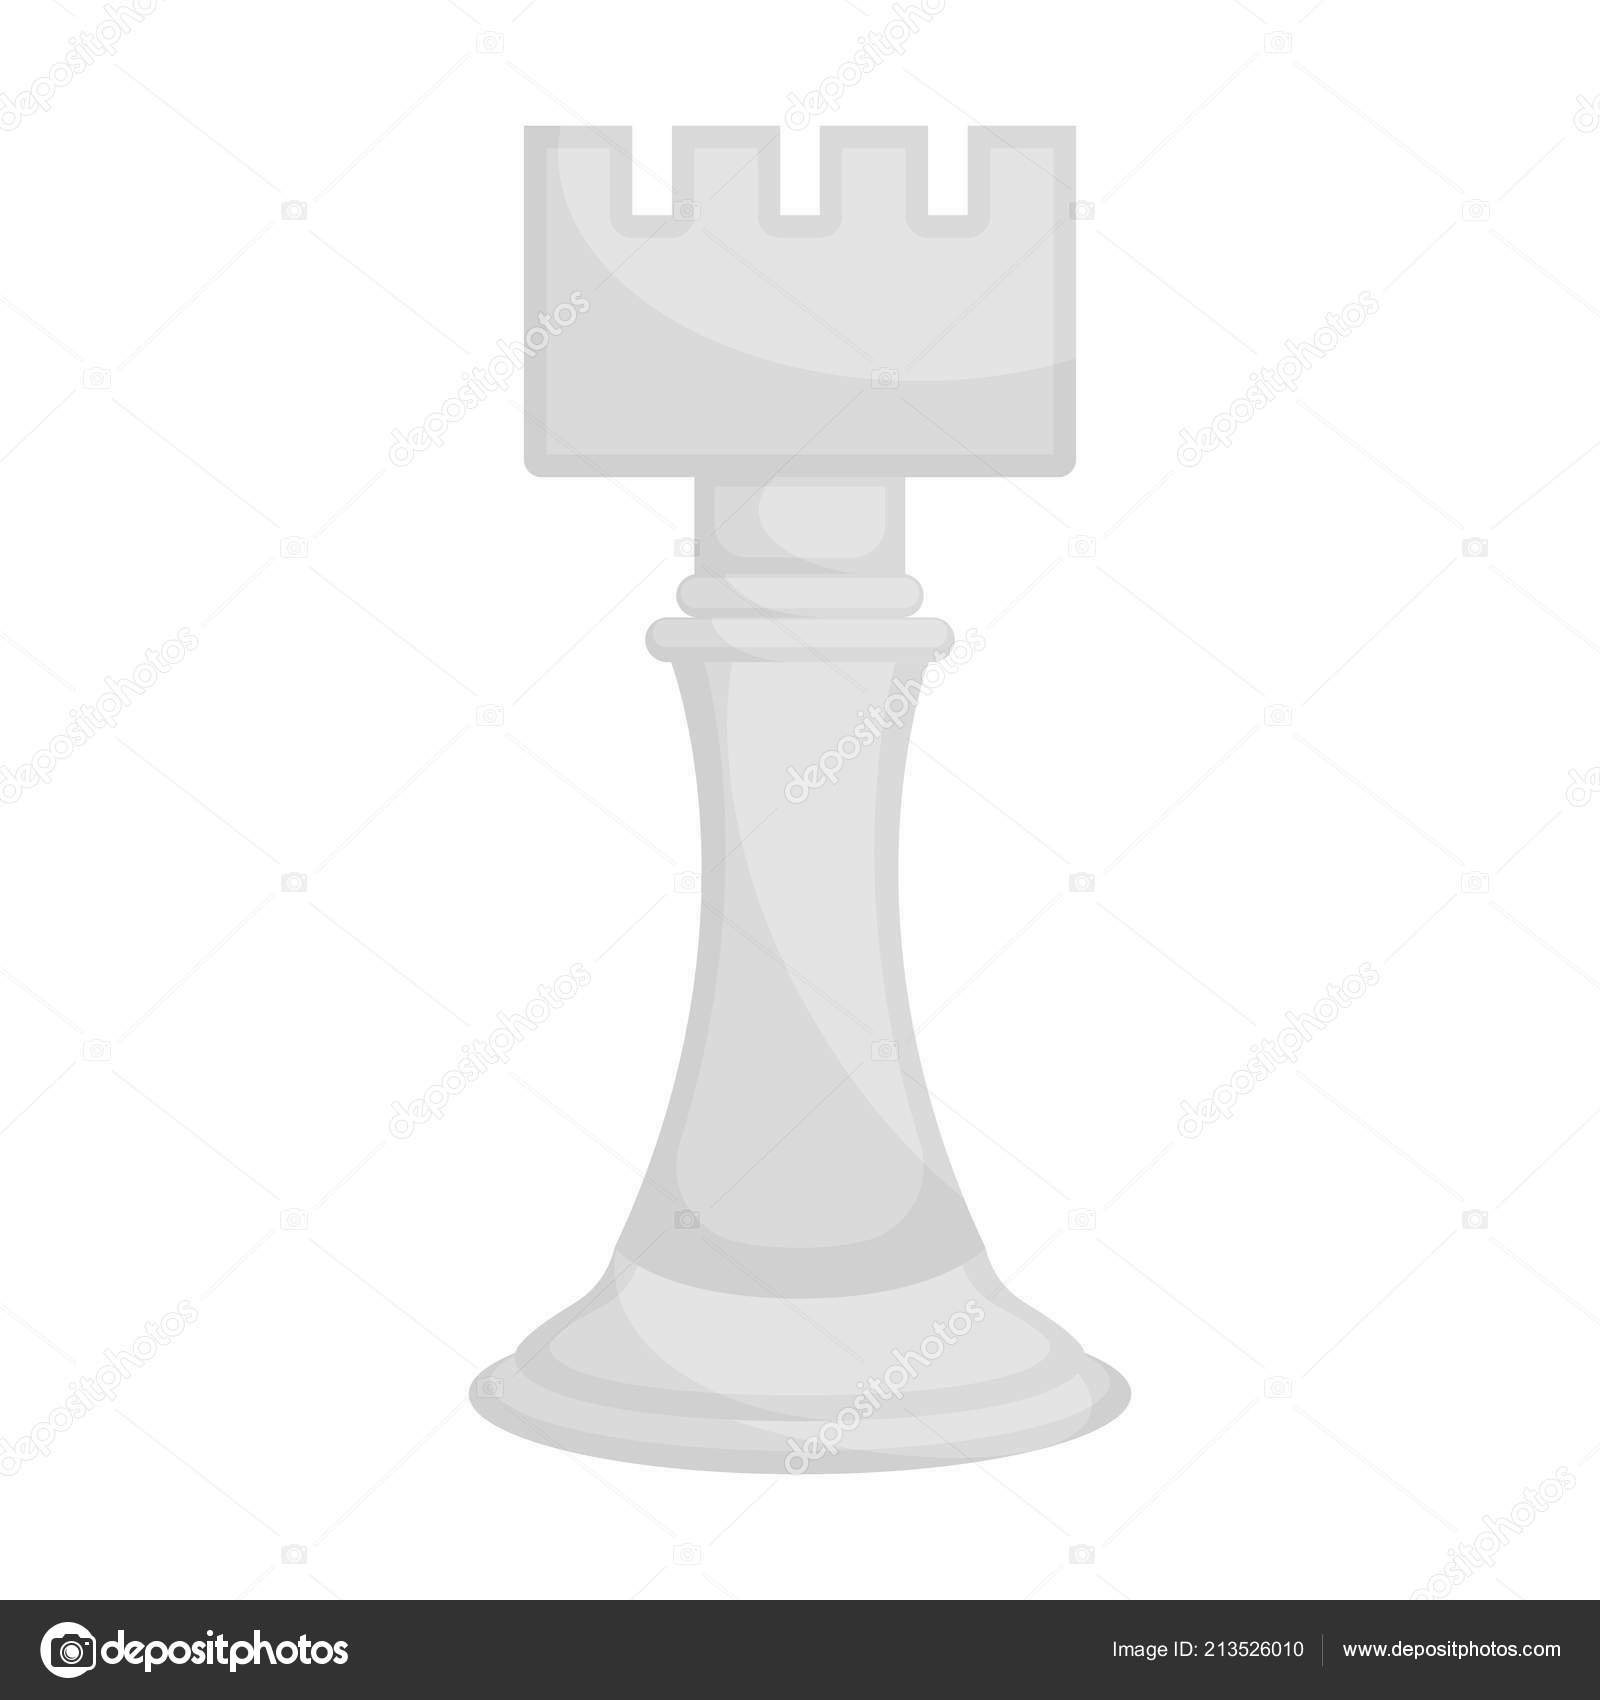

In [ ]:
import numpy as np
import matplotlib.pyplot as plt      # importing the matplotlib and cv2 for plottig and reading the image file
import cv2


from google.colab.patches import cv2_imshow

img= cv2.imread("Chessman-image-dataset/Chess/Rook/00000197.jpg")

gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def Binarypattern(im):                               # creating function to get local binary pattern
    img= np.zeros_like(im)
    n=3                                              # taking kernel of size 3*3
    for i in range(0,im.shape[0]-n):                 # for image height
      for j in range(0,im.shape[1]-n):               # for image width
            x  = im[i:i+n,j:j+n]                     # reading the entire image in 3*3 format
            center       = x[1,1]                    # taking the center value for 3*3 kernel
            img1        = (x >= center)*1.0          # checking if neighbouring values of center value is greater or less than center value
            img1_vector = img1.T.flatten()           # getting the image pixel values
            img1_vector = np.delete(img1_vector,4)
            digit = np.where(img1_vector)[0]
            if len(digit) >= 1:                     # converting the neighbouring pixels according to center pixel value
                num = np.sum(2**digit)              # if n> center assign 1 and if n
            else:                                   # if 1 then multiply by 2^digit and if 0 then making value 0 and aggregating all the values of kernel to get new center value
                num = 0
            img[i+1,j+1] = num
    return(img)

In [ ]:
imgLBP=Binarypattern(gray_img)             # calling the LBP function using gray image
vectorLBP = imgLBP.flatten()               # for histogram using the vector form of image pixels
fig=plt.figure(figsize=(20,8))             #subplotting the gray, LBP and histogram
ax  = fig.add_subplot(1,3,1)
ax.imshow(gray_img)
ax.set_title("gray scale image")
ax  = fig.add_subplot(1,3,2)
ax.imshow(imgLBP,cmap="gray")
ax.set_title("LBP converted image")
ax  = fig.add_subplot(1,3,3)
freq,lbp, _ = ax.hist(vectorLBP,bins=2**8)
ax.set_ylim(0,40000)
lbp = lbp[:-1]
## print the LBP values when frequencies are high
largeTF = freq > 5000
for x, fr in zip(lbp[largeTF],freq[largeTF]):
     ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
ax.set_title("LBP histogram")
plt.show()

#LBP DENGAN GAMBAR PAWN

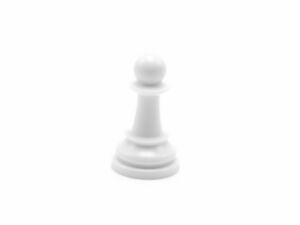

In [ ]:
import numpy as np
import matplotlib.pyplot as plt      # importing the matplotlib and cv2 for plottig and reading the image file
import cv2


from google.colab.patches import cv2_imshow

img= cv2.imread("/content/Chessman-image-dataset/Chess/Pawn/00000109.jpg")

gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def Binarypattern(im):                               # creating function to get local binary pattern
    img= np.zeros_like(im)
    n=3                                              # taking kernel of size 3*3
    for i in range(0,im.shape[0]-n):                 # for image height
      for j in range(0,im.shape[1]-n):               # for image width
            x  = im[i:i+n,j:j+n]                     # reading the entire image in 3*3 format
            center       = x[1,1]                    # taking the center value for 3*3 kernel
            img1        = (x >= center)*1.0          # checking if neighbouring values of center value is greater or less than center value
            img1_vector = img1.T.flatten()           # getting the image pixel values
            img1_vector = np.delete(img1_vector,4)
            digit = np.where(img1_vector)[0]
            if len(digit) >= 1:                     # converting the neighbouring pixels according to center pixel value
                num = np.sum(2**digit)              # if n> center assign 1 and if n
            else:                                   # if 1 then multiply by 2^digit and if 0 then making value 0 and aggregating all the values of kernel to get new center value
                num = 0
            img[i+1,j+1] = num
    return(img)

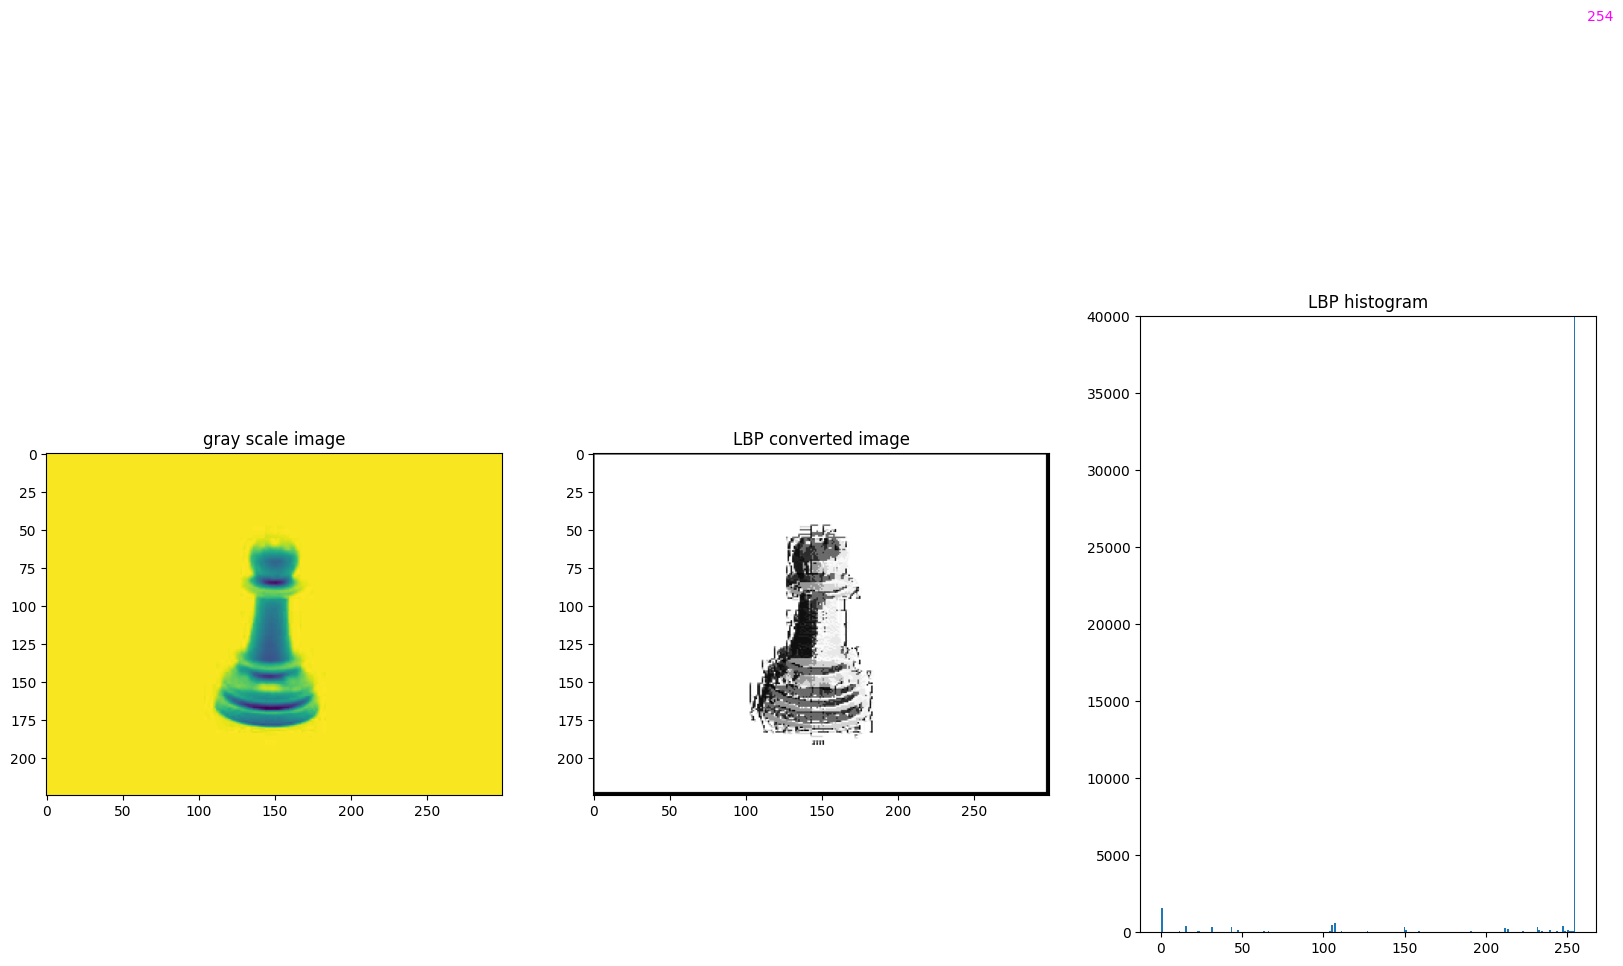

In [ ]:
imgLBP=Binarypattern(gray_img)             # calling the LBP function using gray image
vectorLBP = imgLBP.flatten()               # for histogram using the vector form of image pixels
fig=plt.figure(figsize=(20,8))             #subplotting the gray, LBP and histogram
ax  = fig.add_subplot(1,3,1)
ax.imshow(gray_img)
ax.set_title("gray scale image")
ax  = fig.add_subplot(1,3,2)
ax.imshow(imgLBP,cmap="gray")
ax.set_title("LBP converted image")
ax  = fig.add_subplot(1,3,3)
freq,lbp, _ = ax.hist(vectorLBP,bins=2**8)
ax.set_ylim(0,40000)
lbp = lbp[:-1]
## print the LBP values when frequencies are high
largeTF = freq > 5000
for x, fr in zip(lbp[largeTF],freq[largeTF]):
     ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
ax.set_title("LBP histogram")
plt.show()

#KHUSUS TENSORFLOW MENGGUNAKAN CNN

#LIBRARY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    tf.config.experimental.set_memory_growth(gpus[0],True)
    tf.config.experimental.set_memory_growth(gpus[1],True)

In [ ]:
import pathlib
data_dir = '/content/Chessman-image-dataset/Chess'
data_dir = pathlib.Path(data_dir).with_suffix('')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

465

#VISUALISASI DATASET

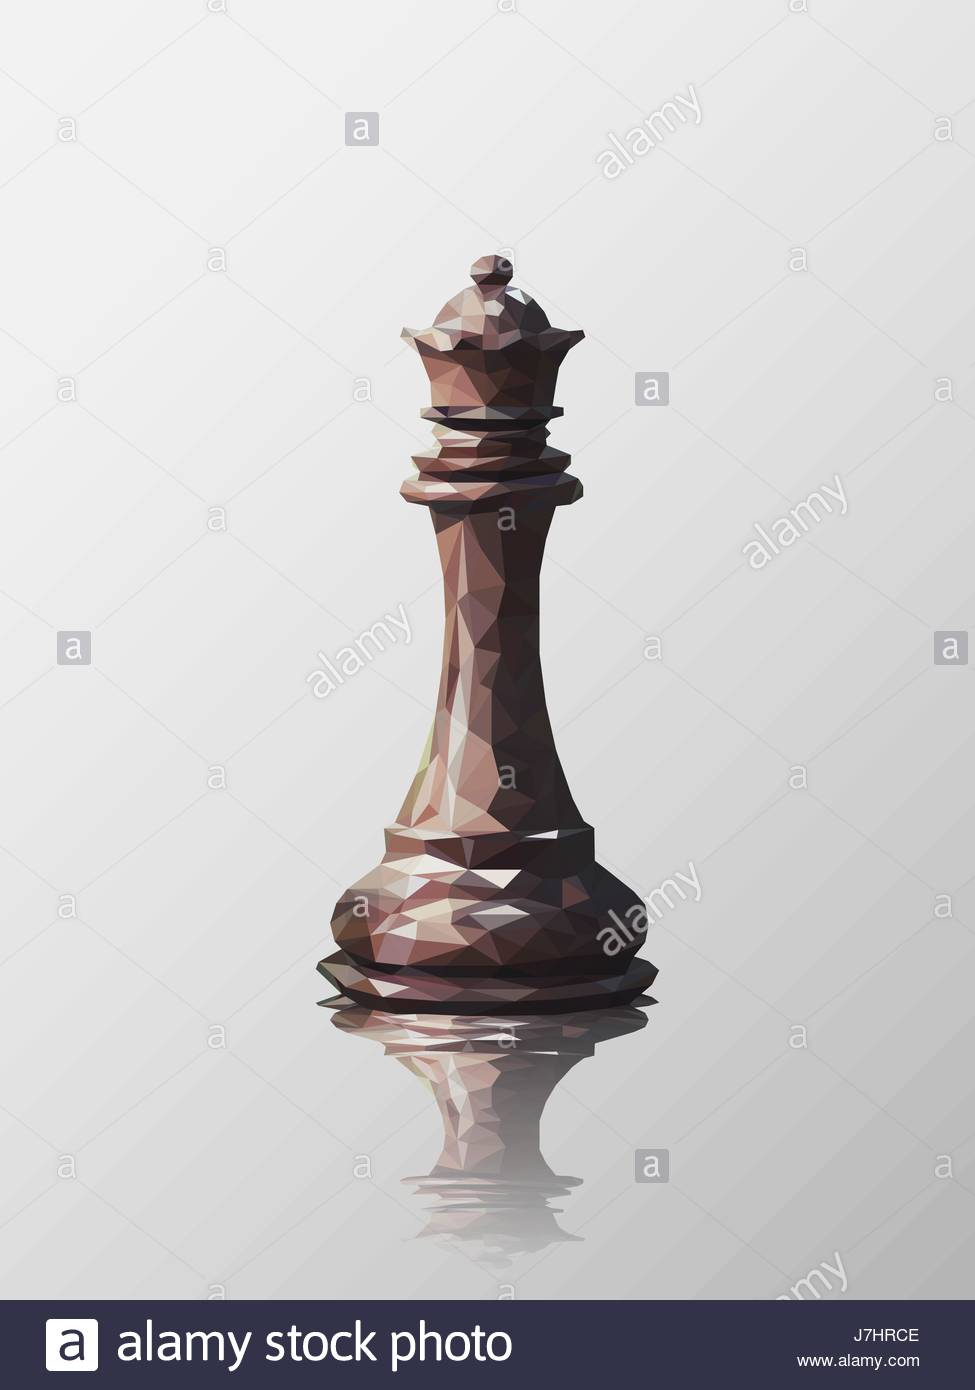

In [ ]:
import PIL
queen = list(data_dir.glob('Queen/*'))
PIL.Image.open(str(queen[0]))

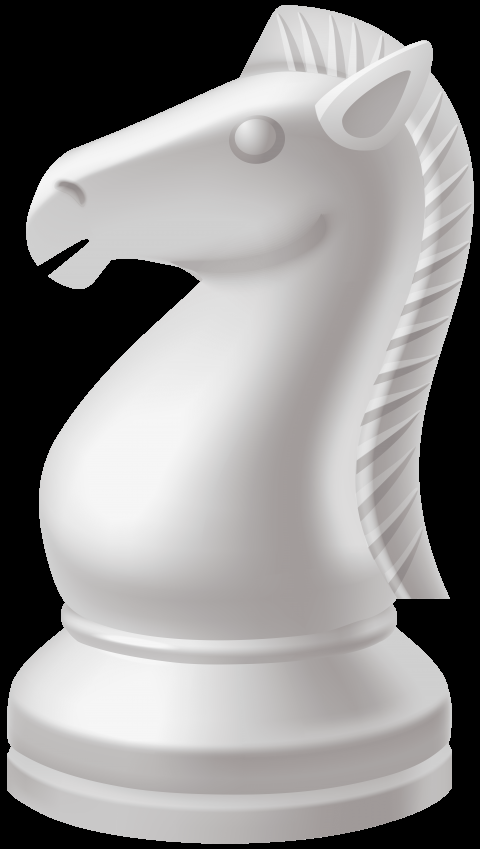

In [ ]:
import PIL
knight = list(data_dir.glob('Knight/*'))
PIL.Image.open(str(knight[0]))

In [ ]:
PIL.Image.open(str(knight[0])).size

(480, 849)

In [ ]:
img_height,img_width,batch_size,epochs = 537,618,64,10

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset='training',
    seed = 123,
    image_size= (img_height,img_width),
    batch_size=batch_size
)

Found 552 files belonging to 6 classes.
Using 442 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset='validation',
    seed = 123,
    image_size= (img_height,img_width),
    batch_size=batch_size
)

Found 552 files belonging to 6 classes.
Using 165 files for validation.


#IMPLEMENTASI CNN (CONVOLUTIONAL NEURAL NETWORK)

---



In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds  = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
from tensorflow import keras
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
num_of_classes = len(train_ds.class_names)
num_of_classes

6

In [ ]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_of_classes)
])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, verbose=1)

Epoch 1/10
7/7 [==============================] - 79s 11s/step - loss: 29.1127 - accuracy: 0.1629 - val_loss: 6.8516 - val_accuracy: 0.1818
Epoch 2/10
7/7 [==============================] - 78s 11s/step - loss: 3.4562 - accuracy: 0.2014 - val_loss: 1.8226 - val_accuracy: 0.2303
Epoch 3/10
7/7 [==============================] - 77s 11s/step - loss: 1.7485 - accuracy: 0.3032 - val_loss: 1.7839 - val_accuracy: 0.2303
Epoch 4/10
7/7 [==============================] - 80s 11s/step - loss: 1.6110 - accuracy: 0.4276 - val_loss: 1.7216 - val_accuracy: 0.2667
Epoch 5/10
7/7 [==============================] - 75s 11s/step - loss: 1.3473 - accuracy: 0.5385 - val_loss: 1.6298 - val_accuracy: 0.3697
Epoch 6/10
7/7 [==============================] - 75s 11s/step - loss: 0.9966 - accuracy: 0.7262 - val_loss: 1.6618 - val_accuracy: 0.4000
Epoch 7/10
7/7 [==============================] - 79s 11s/step - loss: 0.7381 - accuracy: 0.8009 - val_loss: 1.4594 - val_accuracy: 0.5030
Epoch 8/10
7/7 [==========

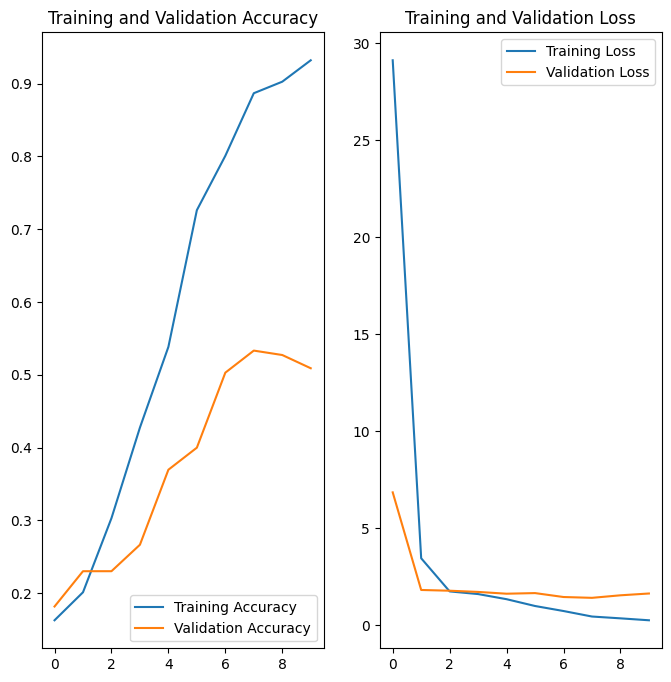

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()